作業 : (Kaggle)房價預測
[作業目標]
試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響
[作業重點]
觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [4]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = 'C:/Users/huang/Documents/GitHub/Part02/'
df_train = pd.read_csv(data_path + 'house_train.csv')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [6]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


作業1
試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

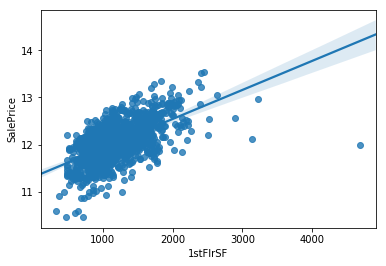

In [8]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()


In [9]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8444097366059928

In [10]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
score = []
for i in range(50):
    df['1stFlrSF_temp'] = df['1stFlrSF'].clip(df['1stFlrSF'].quantile(i/1000),df['1stFlrSF'].quantile(1-i/1000))
    # 做線性迴歸, 觀察分數
    train_X = MMEncoder.fit_transform(df.drop('1stFlrSF',axis=1))
    estimator = LinearRegression()
    score.append([i/100,cross_val_score(estimator, train_X, train_Y, cv=5).mean()])
    df.drop('1stFlrSF_temp',axis=1)
score = pd.DataFrame(score).sort_values(1)
score

,0,1
1,0.01,0.697363
0,0.00,0.846181
49,0.49,0.862031
48,0.48,0.862085
47,0.47,0.862152
46,0.46,0.862251
45,0.45,0.862258
44,0.44,0.862351
43,0.43,0.862479
42,0.42,0.863264


作業2
續前題, 去除離群值有兩類方式 : 捨棄離群值(刪除離群的資料) 以及調整離群值,
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [11]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
score = []
for i in range(50):
    index = (df['1stFlrSF'] > df['1stFlrSF'].quantile(i/1000)) & (df['1stFlrSF'] < df['1stFlrSF'].quantile(1-i/1000))
    # 做線性迴歸, 觀察分數
    train_X = MMEncoder.fit_transform(df.loc[index])
    estimator = LinearRegression()
    score.append([i/100,cross_val_score(estimator, train_X, train_Y.loc[index], cv=5).mean()])
score = pd.DataFrame(score).sort_values(1)
score

,0,1
46,0.46,0.871929
45,0.45,0.871929
1,0.01,0.876369
0,0.00,0.878144
37,0.37,0.878442
49,0.49,0.878657
39,0.39,0.878691
48,0.48,0.878812
47,0.47,0.879185
44,0.44,0.879900
